In [61]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve

%matplotlib inline
sns.set_style('whitegrid')

# Christmas notebook

## 1. Easy equation solver

Matlab has a special function called ``fsolve`` that solves simple equations of the form $f(x) = 0 $.

This come quite handy for simple univariate problems. The python equivalent is also called ``fsolve``. You can see how we import it unpstairs.

Actually, if you do have time to spare this Christmas, I recommend taking a look at all of the optimizations routines scipy offers [here](https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html). Keep this page close, for we will use it later on when talking about estimation and function approximation.

Let's learn how to use fsolve with a familiar model: the Shaphiro-Stiglitz model.

In [62]:
# Parameters
pams = {"z" : 0.1,
        "e" : 1,
        "q" : 0.1,
        "lam":0.1,
        "r" : 0.03,
        "alpha":0.33}


K = 100
N = 100

$\rightarrow$ In the cells bellow, type in the two equations of the model, using the parameters declared above.

In case you forgot, those are:

Non-shrinking condition:

$$w=z+e+\frac{e}{q}\Big[\frac{\lambda}{u}+r\Big]$$

Labour demand (assume Cobb-Douglas):

$$w=F'(L)$$

In [76]:
def Fl(L,K=K,alpha=pams['alpha'],A=10):
    return A*(K/L)**alpha*(1-alpha)

In [128]:
def NSC(u,params=pams):
    z, e, q, lam, r = params["z"], params['e'],params['q'],params['lam'],params['r']
    return z + e + (e/q) * (lam/u) + r * (e/q)

In [129]:
ugrid = np.linspace(1,0,1000)
Lgrid = N - ugrid*N

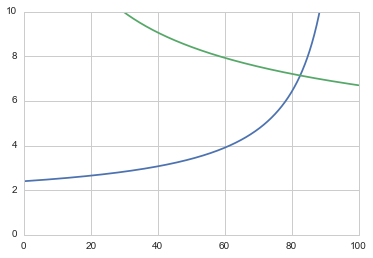

In [130]:
plt.plot(Lgrid,NSC(ugrid))
plt.plot(Lgrid,Fl(Lgrid))
plt.ylim(0,10)
plt.show()

In [131]:
eq = lambda x : NSC(x) - Fl(N - x*N)
ueq = fsolve(eq,0.6)
Leq = N - ueq*N
print ueq

[ 0.174303]


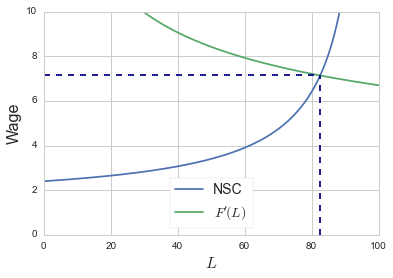

In [132]:
plt.plot(Lgrid,NSC(ugrid), label='NSC')
plt.plot(Lgrid,Fl(Lgrid), label="$F'(L)$")
plt.plot( (Leq,Leq), (0,NSC(ueq)), ls='--', c='navy')
plt.plot( (0,Leq), (NSC(ueq),NSC(ueq)), ls='--' , c='navy')
plt.xlabel("$L$", fontsize=16)
plt.ylabel('Wage', fontsize=16)
plt.legend(loc='best',frameon=True,fontsize=14)
plt.ylim(0,10)
plt.show()

In [133]:
pam2 = pams.copy()
pam2['lam'] = 0.2
eq2 = lambda x : NSC(x,params=pam2) - Fl(N - x*N, alpha=pam2['alpha'])
ueq2 = fsolve(eq2,0.6)
Leq2 = N - ueq2*N
print ueq2

[ 0.32175847]


In [134]:
pam3 = pams.copy()
pam3['r'] = 0.12
eq3 = lambda x : NSC(x,params=pam3) - Fl(N - x*N, alpha=pam3['alpha'])
ueq3 = fsolve(eq3,0.6)
Leq3 = N - ueq3*N
print ueq3

[ 0.20318988]


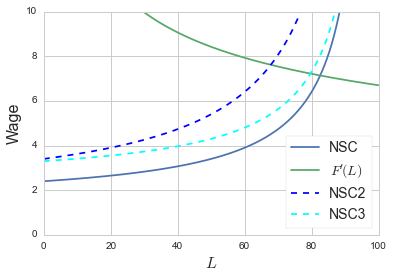

In [135]:
plt.plot(Lgrid,NSC(ugrid), label='NSC')
plt.plot(Lgrid,Fl(Lgrid), label="$F'(L)$")
plt.plot(Lgrid,NSC(ugrid,pam2), label='NSC2', c='blue', ls='--')
plt.plot(Lgrid,NSC(ugrid,pam3), label='NSC3', c='cyan', ls='--')

#plt.plot( (Leq,Leq), (0,NSC(ueq)), ls='--', c='navy')
#plt.plot( (0,Leq), (NSC(ueq),NSC(ueq)), ls='--' , c='navy')
plt.xlabel("$L$", fontsize=16)
plt.ylabel('Wage', fontsize=16)
plt.legend(loc='best',frameon=True,fontsize=14)
plt.ylim(0,10)
plt.show()

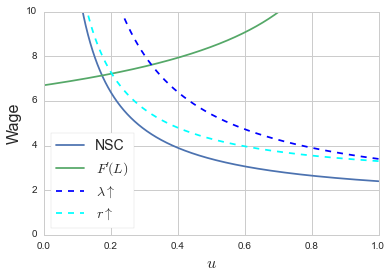

In [136]:
plt.plot(ugrid,NSC(ugrid), label='NSC')
plt.plot(ugrid,Fl(Lgrid), label="$F'(L)$")
plt.plot(ugrid,NSC(ugrid,params=pam2), label='$\lambda \uparrow$', c='blue', ls='--')
plt.plot(ugrid,NSC(ugrid,params=pam3), label='$r \uparrow$', c='cyan', ls='--')

#plt.plot( (Leq,Leq), (0,NSC(ueq)), ls='--', c='navy')
#plt.plot( (0,Leq), (NSC(ueq),NSC(ueq)), ls='--' , c='navy')
plt.xlabel("$u$", fontsize=16)
plt.ylabel('Wage', fontsize=16)
plt.legend(loc='best',frameon=True,fontsize=14)
plt.ylim(0,10)
plt.show()

In [112]:
import sympy as sym

In [114]:
z,e,q,lam,u,r = sym.var("z,e,q,lam,u,r")
w = z + e + (e/q) * ( (lam/u) + r)